## Modelling and Evaluation

### Objectives
* Answer business requirement 2:
    - The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew

### Inputs
* Split datasets:
    - inputs/datasets/cherry-leaves/train
    - inputs/datasets/cherry-leaves/validation
    - inputs/datasets/cherry-leaves/test

### Outputs
* Leafs healt classification.
* Save model.
* 

---

## Change working directory
Change from working to root directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/pp5mildew/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))

current_dir = os.getcwd()
current_dir

'/workspace/pp5mildew'

---

### Import pakages

In [3]:
%pip install -r ./requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

sns.set_style("white")

### Setup directories and variables

#### Store file paths
input

In [18]:
data_dir = "inputs/datasets/cherry-leaves"

train_dir = data_dir + "/train"
val_dir = data_dir + "/validation"
test_dir = data_dir + "/test"

### Create outputs directory

In [21]:
version = "v1"

file_path = f"outputs/{version}"

if "outputs" in os.listdir(current_dir) and version in os.listdir(current_dir + "/outputs"):
    print("This version tag has already been used. Create a new version.")
    pass
else:
    os.makedirs(name=file_path)

This version tag has already been used. Create a new version.


### Store labels

In [22]:
labels = os.listdir(train_dir)
print("The image labels are:", labels)

The image labels are: ['healthy', 'powdery_mildew']


---

### Display the balance of target labels

In [23]:
#Function is from CI Walktrough

def plot_target_balance_per_set(data_dir, save_image=False):
    df_freq = pd.DataFrame([])
    for folder in ["train", "validation", "test"]:
        for label in labels:
            df_freq = df_freq.append(
                pd.Series(
                    data={
                        "Set": folder,
                        "Label": label,
                        "Frequency": int(
                            len(os.listdir(data_dir + "/" + folder + "/" + label))
                        ),
                    }
                ),
                ignore_index=True,
            )

            print(
                f"* {folder} - {label}: {len(os.listdir(data_dir+'/'+ folder + '/' + label))} images"
            )

    print("\n")
    sns.set_style("white")
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_freq, x="Set", y="Frequency", hue="Label")

    if save_image:
        plt.savefig(
            f"{file_path}/labels_distribution.png", bbox_inches="tight", dpi=150
        )

    plt.show()

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




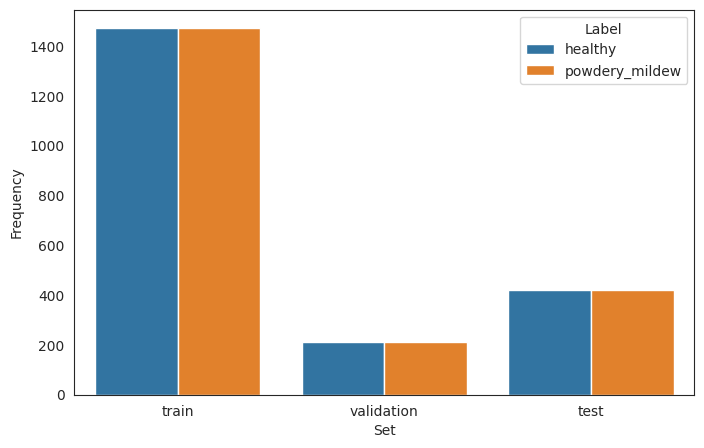

In [24]:
plot_target_balance_per_set(data_dir)

Save image

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




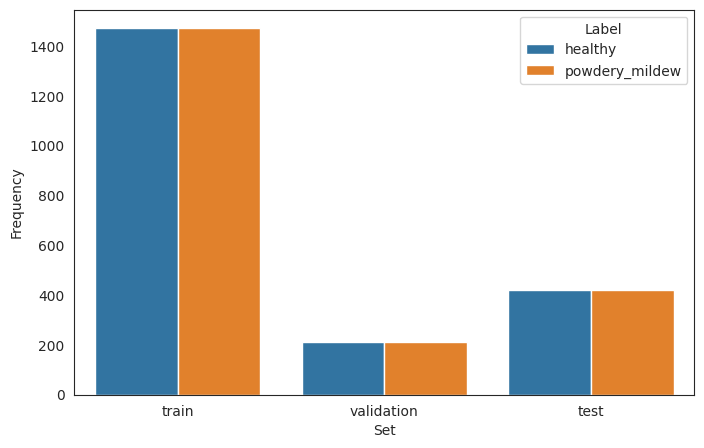

In [25]:
plot_target_balance_per_set(data_dir, save_image=True)

---

### Load iamges

In [26]:
from tensorflow.keras.utils import image_dataset_from_directory

batch_size = 20

train_set = image_dataset_from_directory(
    train_dir,
    label_mode="categorical",  
    seed=123,
    batch_size=batch_size,
)

train_set 

Found 2944 files belonging to 2 classes.


2024-04-17 09:26:56.738639: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<BatchDataset shapes: ((None, 256, 256, 3), (None, 2)), types: (tf.float32, tf.float32)>

In [27]:
validation_set = image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    seed=123,
    batch_size=batch_size,
)

validation_set 


Found 2944 files belonging to 2 classes.


<BatchDataset shapes: ((None, 256, 256, 3), (None, 2)), types: (tf.float32, tf.float32)>

In [28]:
test_set = image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    seed=123,
    batch_size=batch_size,
)

test_set 

Found 2944 files belonging to 2 classes.


<BatchDataset shapes: ((None, 256, 256, 3), (None, 2)), types: (tf.float32, tf.float32)>

---


### Save class names

In [29]:
import joblib

joblib.dump(value=train_set.class_names, filename=f"{file_path}/class_names.pkl")

['outputs/v1/class_names.pkl']

---

### Model Creation

Import model packages

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Rescaling

In [31]:
image_shape = (256, 256, 3)

def create_model():
    model = Sequential()

    
    model.add(Rescaling(1.0 / 255))

   
    model.add(
        Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation="relu",)
    )
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(
        Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation="relu",)
    )
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(
        Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation="relu",)
    )
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))

    model.add(Dense(2, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"],
    )

    return model

---

### Model training

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=3)

### Fit model for training

In [33]:
model = create_model()

model.fit(
    train_set,
    epochs=100,
    validation_data=validation_set,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100


2024-04-17 09:27:19.355896: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2024-04-17 09:27:19.471404: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165160960 exceeds 10% of free system memory.
2024-04-17 09:27:20.300131: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165160960 exceeds 10% of free system memory.


  1/148 [..............................] - ETA: 4:08 - loss: 0.7076 - accuracy: 0.4500

2024-04-17 09:27:20.580682: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165160960 exceeds 10% of free system memory.
2024-04-17 09:27:21.590111: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165160960 exceeds 10% of free system memory.


  2/148 [..............................] - ETA: 3:08 - loss: 1.7413 - accuracy: 0.4000

2024-04-17 09:27:21.879054: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 165160960 exceeds 10% of free system memory.


148/148 [==============================] - 193s 1s/step - loss: 0.2886 - accuracy: 0.8665 - val_loss: 0.0589 - val_accuracy: 0.9776
Epoch 2/100
148/148 [==============================] - 219s 1s/step - loss: 0.0397 - accuracy: 0.9908 - val_loss: 0.0105 - val_accuracy: 0.9980
Epoch 3/100
148/148 [==============================] - 272s 2s/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0057 - val_accuracy: 0.9997
Epoch 4/100
148/148 [==============================] - 209s 1s/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0010 - val_accuracy: 0.9997
Epoch 5/100
148/148 [==============================] - 280s 2s/step - loss: 0.0043 - accuracy: 0.9983 - val_loss: 4.8679e-04 - val_accuracy: 1.0000
Epoch 6/100
148/148 [==============================] - 194s 1s/step - loss: 0.0164 - accuracy: 0.9935 - val_loss: 0.0408 - val_accuracy: 0.9925
Epoch 7/100
148/148 [==============================] - 196s 1s/step - loss: 0.0413 - accuracy: 0.9881 - val_loss: 2.9227e-04 - val_accuracy: 1.0

Save model

In [34]:
model.save('outputs/v1/leaf_health_model_h5')

2024-04-17 10:17:07.898990: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: outputs/v1/leaf_health_model_h5/assets


---

### Model Evaluation

#### Show model learning curve

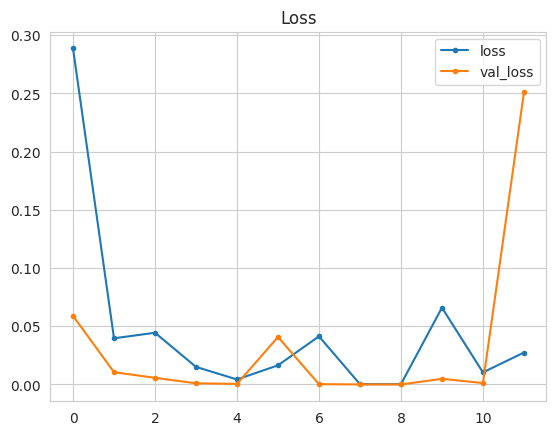

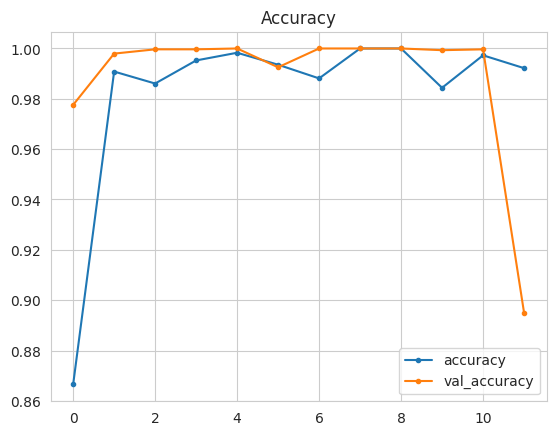

In [35]:
def plot_learning_curve(model, save_image=False):
    losses = pd.DataFrame(model.history.history)

    sns.set_style("whitegrid")
    losses[["loss", "val_loss"]].plot(style=".-")
    plt.title("Loss")
    if save_image:
        plt.savefig(f"{file_path}/model_training_losses.png", bbox_inches="tight", dpi=150)
    plt.show()

    print("\n")
    losses[["accuracy", "val_accuracy"]].plot(style=".-")
    plt.title("Accuracy")
    if save_image:
        plt.savefig(f"{file_path}/model_training_accuracy.png", bbox_inches="tight", dpi=150)
    plt.show()

plot_learning_curve(model)

#### Save the images

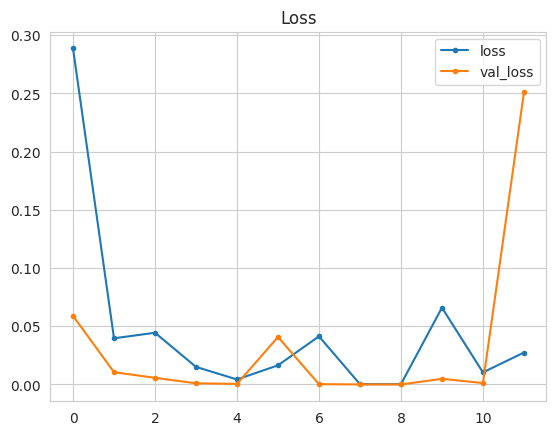

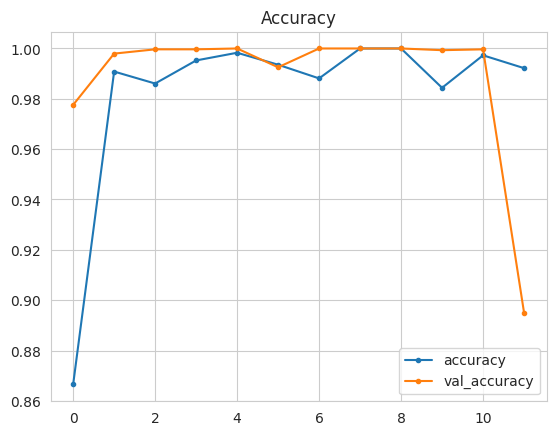

In [36]:
plot_learning_curve(model, save_image=True)

#### Model testing

In [37]:
evaluation = model.evaluate(test_set)

print("Loss: ", evaluation[0])
print("Accuracy: ", evaluation[1])

148/148 [==============================] - 48s 325ms/step - loss: 0.2508 - accuracy: 0.8950
Loss:  0.25079545378685
Accuracy:  0.89504075050354


save the test

In [38]:
joblib.dump(value=evaluation, filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

Check the model size (max 100mb)

In [43]:
os.stat('outputs/v1/leaf_health_model_h5').st_size

84

### Test on live data

Image shape: (256, 256)


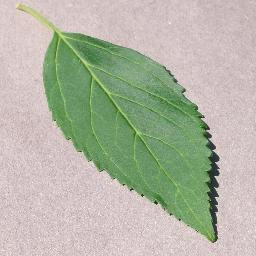

In [44]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]

test_image = image.load_img(
    test_dir + "/" + label + "/" + os.listdir(test_dir + "/" + label)[pointer],
    target_size=image_shape, 
    color_mode="rgb",
)

print(f"Image shape: {test_image.size}")
test_image

Convert the images to an array

In [45]:
test_image = np.expand_dims(image.img_to_array(test_image), axis=0)
test_image.shape 

(1, 256, 256, 3)

In [46]:
class_names = train_set.class_names

prediction_probs = model.predict(test_image)

prediction_class = class_names[np.argmax(prediction_probs, axis=1)[0]]
prediction_class

'healthy'

## Conlusions and next steps

The trained model performed with 99% accuracy on the test data, which meets the business requirement (97% accuracy)